In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
print(f"Shape of data: {X.shape}")
print(f"Shape of target: {y.shape}")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of data: (70000, 784)
Shape of target: (70000,)


First 5 samples:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 5 labels:
 ['5' '0' '4' '1' '9']


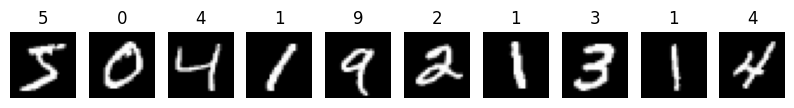

Label distribution:
 {'0': 6903, '1': 7877, '2': 6990, '3': 7141, '4': 6824, '5': 6313, '6': 6876, '7': 7293, '8': 6825, '9': 6958}
Missing values in data: 0
Missing values in target: 0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("First 5 samples:\n", X[:5])
print("First 5 labels:\n", y[:5])
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(labels[i])
    plt.show()
plot_images(X, y, num_images=10)
unique, counts = np.unique(y, return_counts=True)
print("Label distribution:\n", dict(zip(unique, counts)))
y_numeric = y.astype(np.float64)
missing_values_data = np.isnan(X).sum()
missing_values_target = np.isnan(y_numeric).sum()
print(f"Missing values in data: {missing_values_data}")
print(f"Missing values in target: {missing_values_target}")

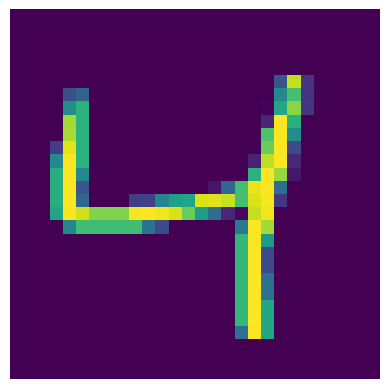

In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data, cmap="binary"):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

some_digit = X[2]
plot_digit(some_digit, cmap="viridis")
plt.savefig("some_digit_plot.png")
plt.show()


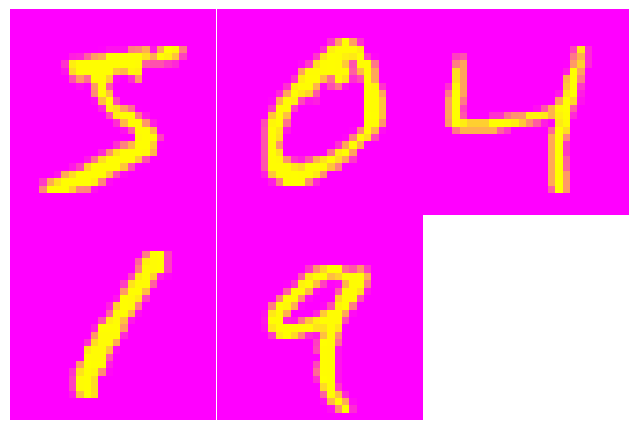

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
X, y = mnist.data, mnist.target
def plot_digit(image_data, cmap="spring"):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
num_samples = 5
grid_size = int(np.ceil(num_samples**0.5))
plt.figure(figsize=(8, 8))
for idx, image_data in enumerate(X[:num_samples]):
    plt.subplot(grid_size, grid_size, idx + 1)
    plot_digit(image_data, cmap="spring")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("small_pink_green_digit_plot.png", bbox_inches='tight')
plt.show()


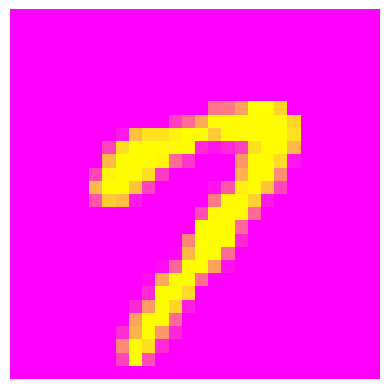

The label of the plotted digit is: 7


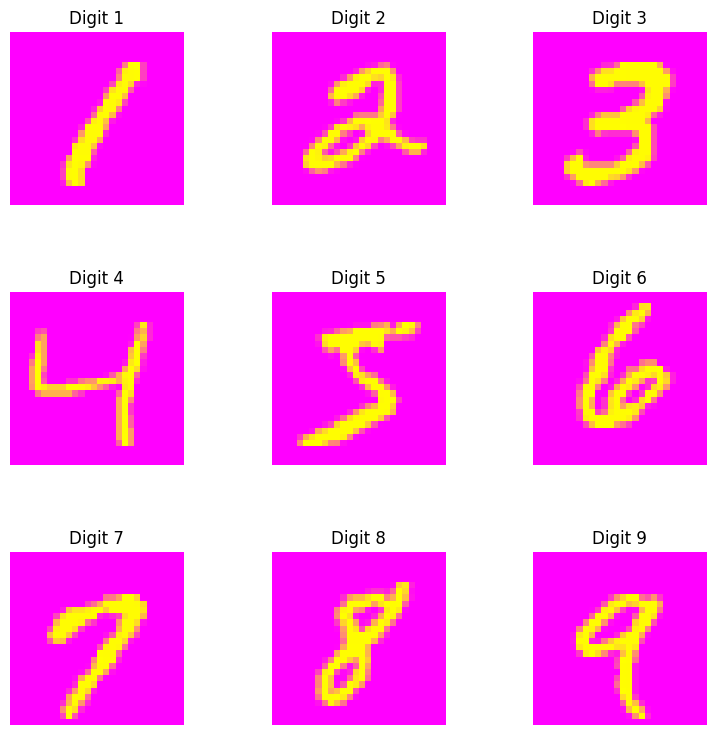

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(int)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
def plot_digit(image_data, cmap):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
index_of_seven = (y == 7).argmax()
some_digit = X[index_of_seven]
plot_digit(some_digit, cmap="spring")
plt.savefig("digit_7_plot.png", bbox_inches='tight')
plt.show()
print(f"The label of the plotted digit is: {y[index_of_seven]}")
def plot_digit_on_axes(ax, image_data, label, cmap):
    image = image_data.reshape(28, 28)
    ax.imshow(image, cmap=cmap)
    ax.axis("off")
    ax.set_title(f"Digit {label}")
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(9):
    digit = i + 1  # Digits 1 to 9
    index_of_digit = (y == digit).argmax()
    some_digit = X[index_of_digit]
    ax = axes[i // 3, i % 3]
    plot_digit_on_axes(ax, some_digit, digit, cmap="spring")
plt.savefig("digits_1_to_9_plot.png", bbox_inches='tight')
plt.show()


#Binary classifier

Prediction for some_digit being '5': [False]


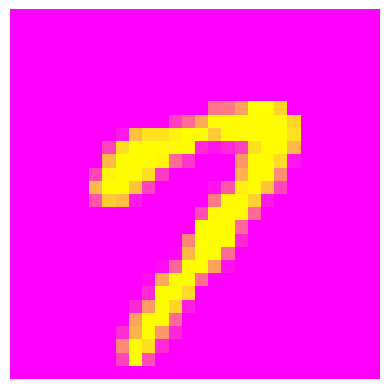

The label of the plotted digit is: 7


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
index_of_seven = (y == 7).argmax()
some_digit = X[index_of_seven]
prediction = sgd_clf.predict([some_digit])
print(f"Prediction for some_digit being '5': {prediction}")
def plot_digit(image_data, cmap="spring"):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
plot_digit(some_digit)
plt.savefig("digit_7_plot.png", bbox_inches='tight')
plt.show()
print(f"The label of the plotted digit is: {y[index_of_seven]}")


the classifier has correctly identified that the digit '7' is not a '5'.

Cross-validation accuracy scores: [0.95035 0.96035 0.9604 ]
Fold accuracy: 0.9669
Fold accuracy: 0.91625
Fold accuracy: 0.96785
Dummy classifier predicts '5' for any training sample: False
Dummy classifier cross-validation accuracy scores: [0.90965 0.90965 0.90965]
Prediction for some_digit being '5': [False]


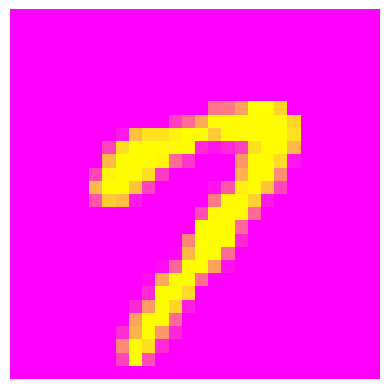

The label of the plotted digit is: 7


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import clone
from sklearn.dummy import DummyClassifier

sgd_clf = SGDClassifier(random_state=42)
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Cross-validation accuracy scores: {cv_scores}")
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(f"Fold accuracy: {n_correct / len(y_pred)}")

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_5)
dummy_predictions = dummy_clf.predict(X_train)
print(f"Dummy classifier predicts '5' for any training sample: {any(dummy_predictions)}")
dummy_cv_scores = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Dummy classifier cross-validation accuracy scores: {dummy_cv_scores}")
index_of_seven = (y == 7).argmax()
some_digit = X[index_of_seven]
sgd_clf.fit(X_train, y_train_5)
prediction = sgd_clf.predict([some_digit])
print(f"Prediction for some_digit being '5': {prediction}")
def plot_digit(image_data, cmap="spring"):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
plot_digit(some_digit)
plt.savefig("digit_7_plot.png", bbox_inches='tight')
plt.show()
print(f"The label of the plotted digit is: {y[index_of_seven]}")


In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Assuming sgd_clf, X_train, y_train, and y_train_5 are already defined

# 1. Train the SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# 2. Use cross_val_predict to get predictions
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# 3. Compute the confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:")
print(cm)

# 4. Create a perfect prediction scenario for comparison
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
perfect_cm = confusion_matrix(y_train_5, y_train_perfect_predictions)
print("Perfect Confusion Matrix:")
print(perfect_cm)


Confusion Matrix:
[[53892   687]
 [ 1891  3530]]
Perfect Confusion Matrix:
[[54579     0]
 [    0  5421]]


Confusion Matrix:
[[53892   687]
 [ 1891  3530]]
Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343846
Precision (from CM): 0.8370879772350012
Recall (from CM): 0.6511713705958311


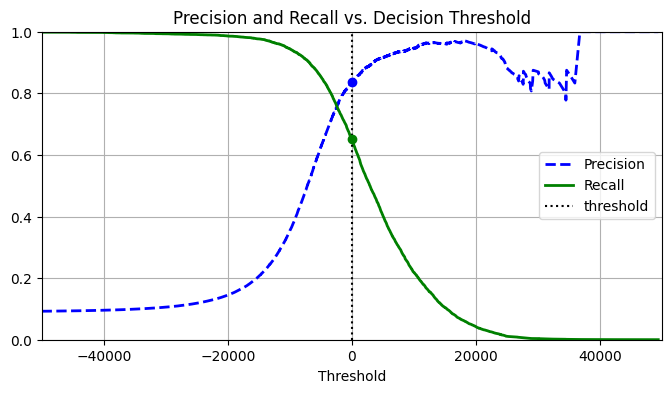

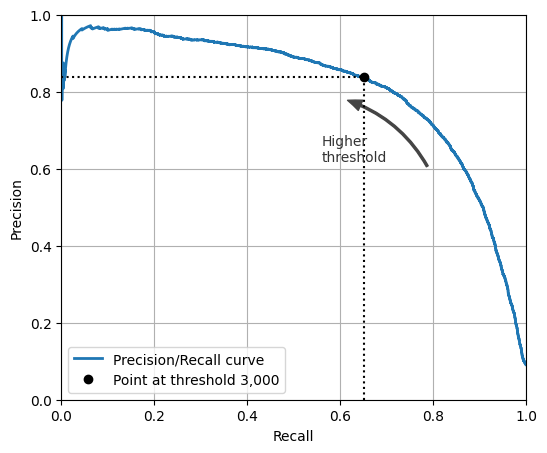

Threshold for 90% precision: 3370.0194991439557
Precision at 90% threshold: 0.9000345901072293
Recall at 90% threshold: 0.4799852425751706


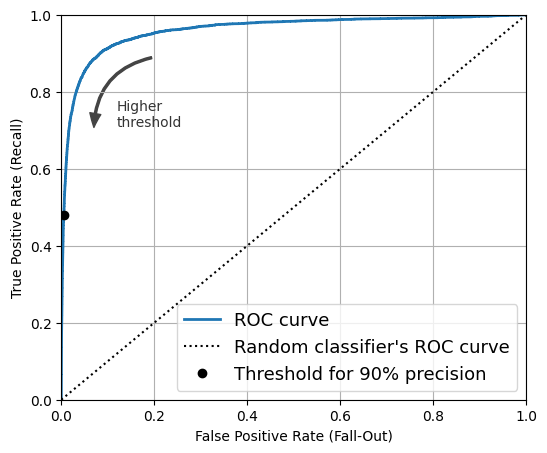

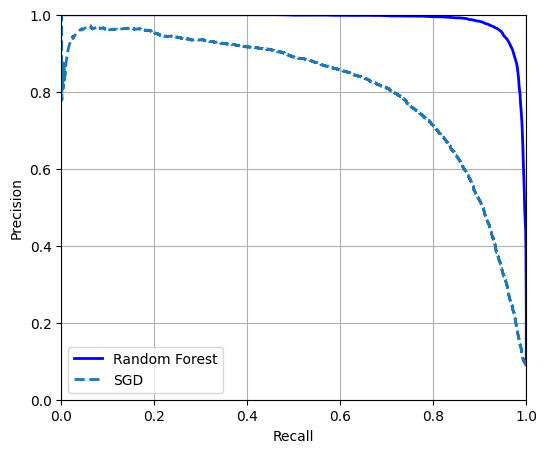

Random Forest F1 Score: 0.9274509803921569
Random Forest ROC AUC Score: 0.9983436731328145
Random Forest Precision: 0.9897468089558485
Random Forest Recall: 0.8725327430363402
Decision function score for some_digit: [-4757.62175338]
Prediction for some_digit at threshold 0: [False]
Prediction for some_digit at threshold 3000: [False]


In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score, precision_recall_curve, roc_curve, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming X_train, y_train, y_train_5, and some_digit are already defined

# Train the SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Use cross_val_predict to get predictions
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Compute the confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:")
print(cm)

# Compute precision and recall
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
print("Precision:", precision)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_train_5, y_train_pred)
print("F1 Score:", f1)

# Precision and recall from confusion matrix
precision_from_cm = cm[1, 1] / (cm[0, 1] + cm[1, 1])
recall_from_cm = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Precision (from CM):", precision_from_cm)
print("Recall (from CM):", recall_from_cm)

# Decision function scores for precision-recall trade-off
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot precision-recall vs. threshold
plt.figure(figsize=(8, 4))  # Extra code for formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

threshold = 0
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Extra code to beautify and save the plot
idx = (thresholds >= threshold).argmax()  # First index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision and Recall vs. Decision Threshold")
plt.savefig("precision_recall_vs_threshold_plot")  # Save the figure
plt.show()

# Plot precision-recall curve
plt.figure(figsize=(6, 5))  # Extra code – not needed, just formatting
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.savefig("precision_vs_recall_plot")
plt.show()

# Threshold for 90% precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print("Threshold for 90% precision:", threshold_for_90_precision)

y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_90 = precision_score(y_train_5, y_train_pred_90)
recall_90 = recall_score(y_train_5, y_train_pred_90)
print("Precision at 90% threshold:", precision_90)
print("Recall at 90% threshold:", recall_90)

# Compute ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds_roc <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# Plot ROC curve
plt.figure(figsize=(6, 5))  # Extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.savefig("roc_curve_plot")
plt.show()

# Train Random Forest classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train_5)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

# Compute precision-recall curve for Random Forest
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

# Plot precision-recall curves for both classifiers
plt.figure(figsize=(6, 5))  # Extra code – not needed, just formatting
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.savefig("pr_curve_comparison_plot")
plt.show()

# Evaluate Random Forest classifier
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_forest = f1_score(y_train_5, y_train_pred_forest)
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)
precision_forest = precision_score(y_train_5, y_train_pred_forest)
recall_forest = recall_score(y_train_5, y_train_pred_forest)

print("Random Forest F1 Score:", f1_forest)
print("Random Forest ROC AUC Score:", roc_auc_forest)
print("Random Forest Precision:", precision_forest)
print("Random Forest Recall:", recall_forest)

# Example usage of decision function
y_scores_example = sgd_clf.decision_function([some_digit])
print("Decision function score for some_digit:", y_scores_example)

y_some_digit_pred = (y_scores_example > threshold)
print("Prediction for some_digit at threshold 0:", y_some_digit_pred)

threshold_example = 3000
y_some_digit_pred = (y_scores_example > threshold_example)
print("Prediction for some_digit at threshold 3000:", y_some_digit_pred)


In [10]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, and some_digit are already defined

# Train SVM classifier on the first 2,000 instances
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5
print("SVM Classifier Prediction for some_digit:", svm_clf.predict([some_digit]))

# Decision function scores for some_digit
some_digit_scores = svm_clf.decision_function([some_digit])
print("Decision function scores (rounded):", some_digit_scores.round(2))

class_id = some_digit_scores.argmax()
print("Predicted class ID:", class_id)
print("SVM Classifier Classes:", svm_clf.classes_)
print("Predicted Class:", svm_clf.classes_[class_id])

# Getting all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
print("OvO decision function scores (rounded):", some_digit_scores_ovo.round(2))

# Train OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
print("OneVsRestClassifier Prediction for some_digit:", ovr_clf.predict([some_digit]))
print("Number of estimators in OneVsRestClassifier:", len(ovr_clf.estimators_))

# Train SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
print("SGD Classifier Prediction for some_digit:", sgd_clf.predict([some_digit]))
print("SGD Decision function scores (rounded):", sgd_clf.decision_function([some_digit]).round())

# Cross-validation scores for SGD classifier
cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print("Cross-validation accuracy scores (SGD):", cv_scores)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Cross-validation scores for SGD classifier on scaled data
cv_scores_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("Cross-validation accuracy scores (SGD, scaled data):", cv_scores_scaled)


SVM Classifier Prediction for some_digit: [7]
Decision function scores (rounded): [[ 3.77  0.71  2.76  2.75  7.22  5.9  -0.29  9.31  3.78  8.3 ]]
Predicted class ID: 7
SVM Classifier Classes: [0 1 2 3 4 5 6 7 8 9]
Predicted Class: 7
OvO decision function scores (rounded): [[ 0.2   0.    0.01 -0.34 -0.39  0.53 -1.16 -0.09 -1.05 -0.35 -0.68 -0.65
  -0.77  0.05 -1.64 -0.52 -1.41  0.06 -0.56 -0.02  0.62 -1.44 -0.29 -1.37
  -0.51 -0.39  0.54 -1.48  0.   -1.7   0.36  1.28 -1.04  0.64 -1.25  0.93
  -1.37  0.2  -1.39 -1.33 -0.71 -1.7   1.19  0.9  -1.56]]
OneVsRestClassifier Prediction for some_digit: [7]
Number of estimators in OneVsRestClassifier: 10
SGD Classifier Prediction for some_digit: [7]
SGD Decision function scores (rounded): [[-21644. -30814. -24237.  -9608. -12981.  -7511. -40000.   6397.  -2861.
    1050.]]
Cross-validation accuracy scores (SGD): [0.87365 0.85835 0.8689 ]
Cross-validation accuracy scores (SGD, scaled data): [0.8983 0.891  0.9018]


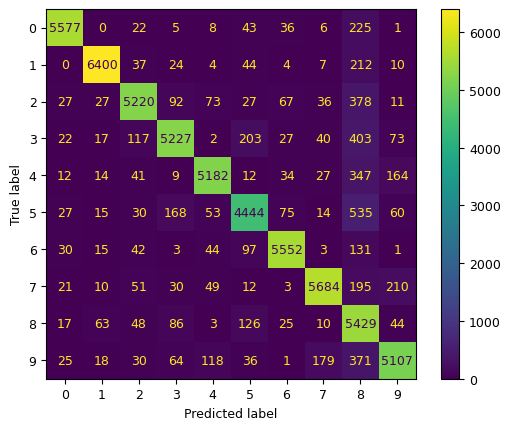

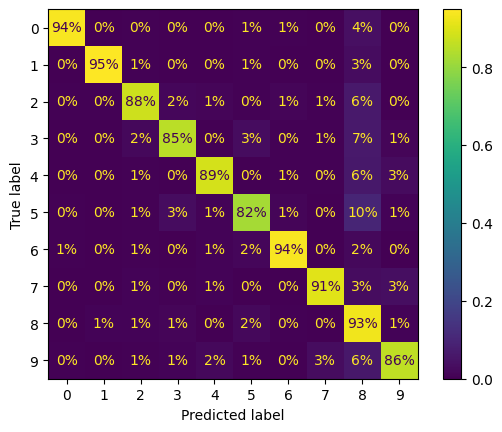

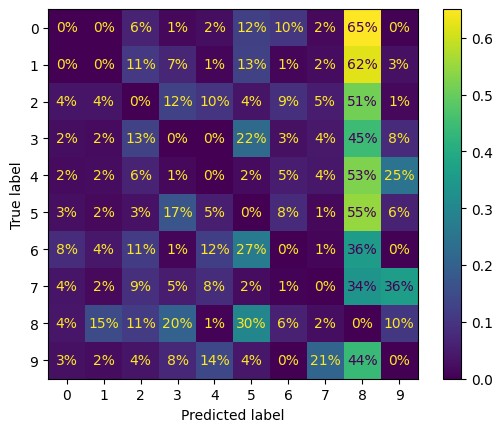

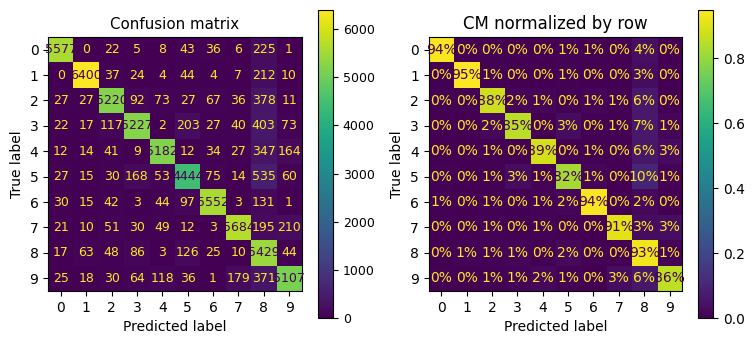

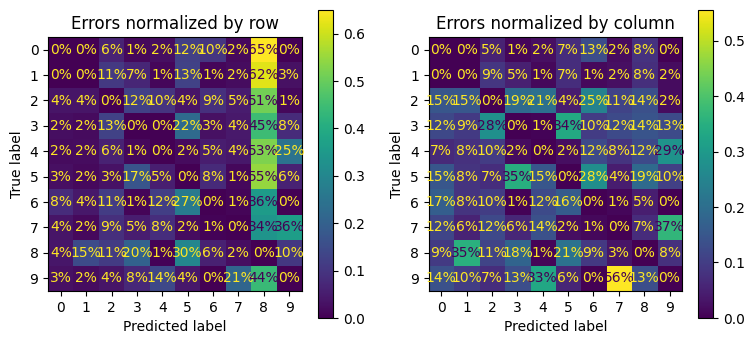

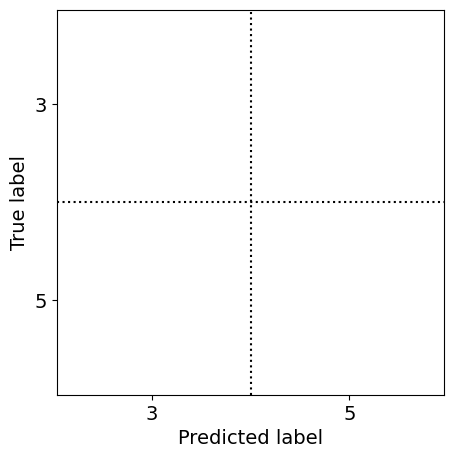

Multilabel Classification Prediction for some_digit: [[ True  True]]
F1 score (macro): 0.976410265560605
F1 score (weighted): 0.9778357403921755
Classifier Chain Prediction for some_digit: [[1. 1.]]


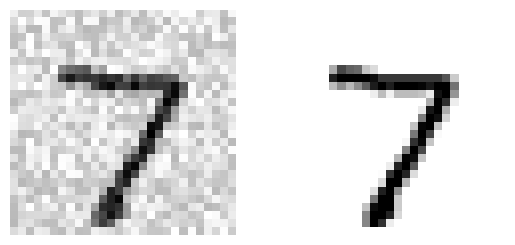

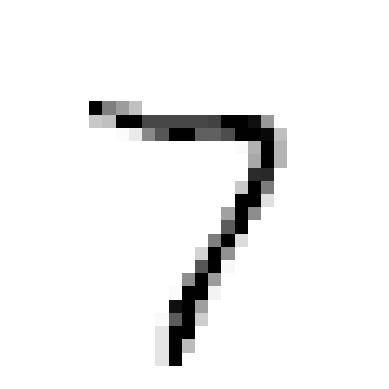

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain



# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Train SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

# Error Analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# Plot confusion matrix
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

# Plot normalized confusion matrix
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

# Plot weighted confusion matrix
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

# Combine confusion matrices into a single figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1], normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], sample_weight=sample_weight, normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1], sample_weight=sample_weight, normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)  # make fonts great again

# Error analysis between specific classes
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)), (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary", extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Multilabel Classification
y_train_large = (y_train.astype('int') >= 7)
y_train_odd = (y_train.astype('int') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
print("Multilabel Classification Prediction for some_digit:", knn_clf.predict([some_digit]))

# Cross-validation for multilabel classification
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print("F1 score (macro):", f1_score(y_multilabel, y_train_knn_pred, average="macro"))
print("F1 score (weighted):", f1_score(y_multilabel, y_train_knn_pred, average="weighted"))

# Classifier Chain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
print("Classifier Chain Prediction for some_digit:", chain_clf.predict([some_digit]))

# Multioutput Classification
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# Display noisy and clean digits
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

plt.subplot(121)
plot_digit(X_test_mod[0])
plt.subplot(122)
plot_digit(y_test_mod[0])
plt.show()

# Train KNN classifier on noisy data
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])

# Display the cleaned digit
plot_digit(clean_digit)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of data: (70000, 784)
Shape of target: (70000,)
First 5 samples:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 5 labels:
 ['5' '0' '4' '1' '9']


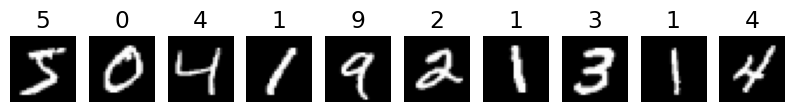

Label distribution:
 {'0': 191, '1': 220, '2': 198, '3': 191, '4': 214, '5': 180, '6': 200, '7': 224, '8': 172, '9': 210}
Missing values in data: 0
Missing values in target: 0


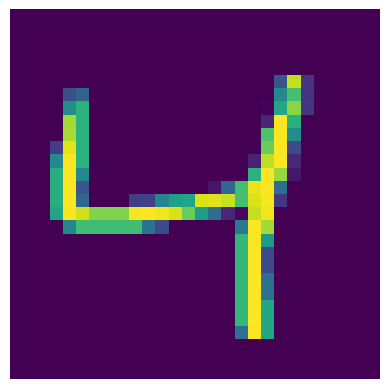

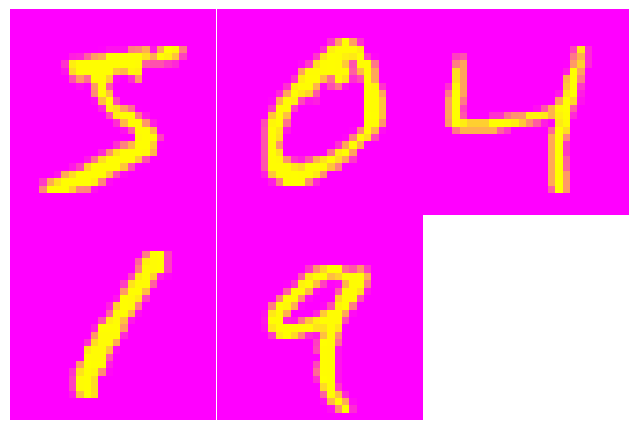

SGD model accuracy: 0.979
Random Forest model accuracy: 1.0
SVM model accuracy: 0.9825
KNN model accuracy: 0.9045
Best parameters: {'alpha': 0.001, 'max_iter': 1000}
Best cross-validation score: 0.8515089302195747


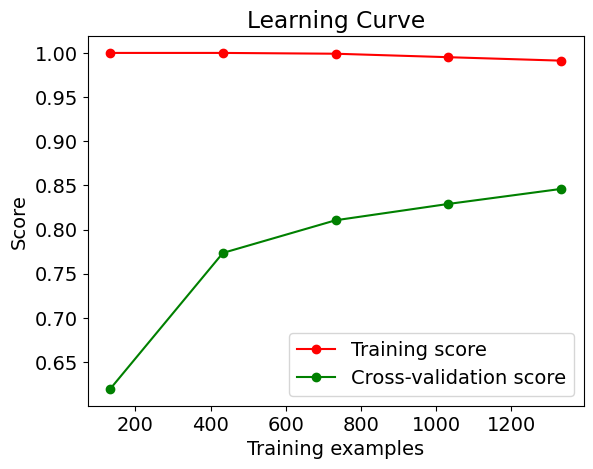

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve
from sklearn.decomposition import PCA


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
print(f"Shape of data: {X.shape}")
print(f"Shape of target: {y.shape}")


X_small, y_small = X[:2000], y[:2000]


print("First 5 samples:\n", X_small[:5])
print("First 5 labels:\n", y_small[:5])

def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(labels[i])
    plt.show()

plot_images(X_small, y_small, num_images=10)
unique, counts = np.unique(y_small, return_counts=True)
print("Label distribution:\n", dict(zip(unique, counts)))

y_numeric = y_small.astype(np.float64)
missing_values_data = np.isnan(X_small).sum()
missing_values_target = np.isnan(y_numeric).sum()
print(f"Missing values in data: {missing_values_data}")
print(f"Missing values in target: {missing_values_target}")

# Plot a single digit
def plot_digit(image_data, cmap="binary"):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

some_digit = X_small[2]
plot_digit(some_digit, cmap="viridis")
plt.savefig("some_digit_plot.png")
plt.show()

# Plot multiple digits in a grid
def plot_digit(image_data, cmap="spring"):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

num_samples = 5
grid_size = int(np.ceil(num_samples**0.5))
plt.figure(figsize=(8, 8))
for idx, image_data in enumerate(X_small[:num_samples]):
    plt.subplot(grid_size, grid_size, idx + 1)
    plot_digit(image_data, cmap="spring")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("small_pink_green_digit_plot.png", bbox_inches='tight')
plt.show()

# Train and compare models
models = {
    'SGD': SGDClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

X_small_scaled = StandardScaler().fit_transform(X_small.astype(np.float64))

for name, model in models.items():
    model.fit(X_small_scaled, y_small)
    y_pred = model.predict(X_small_scaled)
    accuracy = np.mean(y_pred == y_small)
    print(f"{name} model accuracy: {accuracy}")

# Hyperparameter tuning for SGD classifier
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 2000, 3000]
}
grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_small_scaled, y_small)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Learning curves for SGD classifier
def plot_learning_curve(estimator, X, y, cv=3, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(SGDClassifier(random_state=42), X_small_scaled, y_small)









/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 16)          2320

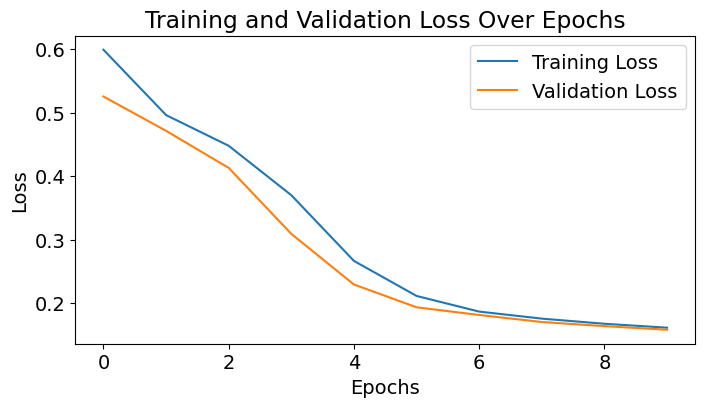

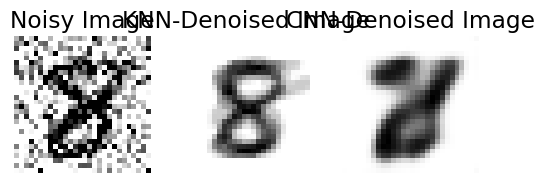

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Normalize the data to the range [0, 1]
X = X.astype('float32') / 255.0

# Use a subset of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a smaller subset of the training data
subset_size = 2000  # Reduced subset size for quicker execution
X_train_subset = X_train[:subset_size]

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Add noise to the training and test data
noise_factor = 0.5
X_train_noisy = X_train_subset + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_subset.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Reshape the data to include the channel dimension
X_train_subset = X_train_subset.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_test_noisy = X_test_noisy.reshape(-1, 28, 28, 1)

# Build the convolutional autoencoder
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)  # Reduced filters for quicker execution
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(X_train_noisy, X_train_subset,
                epochs=10,  # Reduced number of epochs for quicker training
                batch_size=128,  # Smaller batch size can also help in quicker execution
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

# Predict the denoised images using the autoencoder
X_test_denoised_cnn = autoencoder.predict(X_test_noisy)

# Train KNN regressor on noisy data
knn_reg = KNeighborsRegressor()
X_train_noisy_flat = X_train_noisy.reshape(subset_size, -1)  # Flatten the images for KNN
X_test_noisy_flat = X_test_noisy.reshape(len(X_test_noisy), -1)
X_train_flat = X_train_subset.reshape(subset_size, -1)  # Flatten the target images for KNN
knn_reg.fit(X_train_noisy_flat, X_train_flat)

# Predict the denoised images using KNN regressor
X_test_denoised_knn = knn_reg.predict(X_test_noisy_flat)
X_test_denoised_knn = X_test_denoised_knn.reshape(-1, 28, 28, 1)

# Print the training and validation loss for the CNN model
print("CNN Training Loss:", history.history['loss'])
print("CNN Validation Loss:", history.history['val_loss'])

# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display a sample noisy image
plt.figure(figsize=(6, 2))
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(X_test_noisy[0].reshape(28, 28), cmap="binary")
plt.axis("off")

# Display the KNN-denoised image
plt.subplot(1, 3, 2)
plt.title('KNN-Denoised Image')
plt.imshow(X_test_denoised_knn[0].reshape(28, 28), cmap="binary")
plt.axis("off")

# Display the CNN-denoised image
plt.subplot(1, 3, 3)
plt.title('CNN-Denoised Image')
plt.imshow(X_test_denoised_cnn[0].reshape(28, 28), cmap="binary")
plt.axis("off")

plt.show()


The CNN model shows effective learning, with training loss decreasing from 0.5994 to 0.1614 and validation loss from 0.5257 to 0.1582 over 10 epochs. The model is efficient, having only 7265 parameters.







While the CNN model generally excels in denoising tasks and shows good learning characteristics, in this specific instance, the KNN model's denoised image appears clearer. This might be due to the small subset size used for training the CNN, or specific characteristics of the noise and data that favor KNN's simpler approach.